<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/SaveToPreTrainedKerasModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving and loading model weights

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

In [3]:
#load data
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#rescale
x_train = x_train/255
x_test = x_test/255

#smaller subset
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]
  
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(10000, 32, 32, 3)
(10000, 1)
(1000, 32, 32, 3)
(1000, 1)


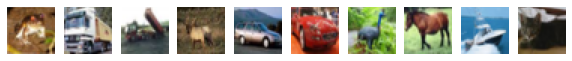

In [110]:
#plot

fig, ax = plt.subplots(1, 10, figsize =(10, 1) )
for i in range(10) :
  ax[i].set_axis_off()
  ax[i].imshow(x_train[i]) 

cifar 60000 color images, each with one of 10 labels

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [5]:
def get_new_model() :
  model = Sequential ( [
                        Conv2D (16, (3,3), activation = 'relu', input_shape = (32,32,3), name = 'Convolutional_1st'), 
                        Conv2D (8, (3,3), activation = 'relu', name = 'Convolutional_2nd'), 
                        MaxPooling2D ((4,4) , name = 'Maxpooling_layer'),
                        Flatten ( name = 'Flatten_layer'),
                        Dense (32, activation = 'relu', name = 'Danse_1st'),
                        Dense (10, activation = 'softmax', name = 'Danse_output')
  ])

  model.compile (optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

In [6]:
model = get_new_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolutional_1st (Conv2D)   (None, 30, 30, 16)        448       
_________________________________________________________________
Convolutional_2nd (Conv2D)   (None, 28, 28, 8)         1160      
_________________________________________________________________
Maxpooling_layer (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
Flatten_layer (Flatten)      (None, 392)               0         
_________________________________________________________________
Danse_1st (Dense)            (None, 32)                12576     
_________________________________________________________________
Danse_output (Dense)         (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
____________________________________________________

In [13]:
def get_test_accuracy(model, x_test, y_test) :
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose='auto')
  print ('accuracy: {acc:0.3f}'.format(acc=test_acc))
  print (f'Loss: {test_loss} ,  Accuracy: {test_acc}')

get_test_accuracy(model, x_test, y_test)


accuracy: 0.483
Loss: 1.483992338180542 ,  Accuracy: 0.4830000102519989


In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint



Checkpoint

In [71]:
checkpoint_patch = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_patch,
                             frequency = 'epochs',
                             save_weights_only = True,
                             verbose = False)

In [50]:
model.fit(x_train, y_train, epochs=  3, verbose = 1, callbacks=[checkpoint])

Epoch 1/3
313/313 [==============================] - 9s 29ms/step - loss: 2.0067 - accuracy: 0.2569
Epoch 2/3
313/313 [==============================] - 9s 29ms/step - loss: 1.6325 - accuracy: 0.4072
Epoch 3/3
313/313 [==============================] - 9s 29ms/step - loss: 1.5184 - accuracy: 0.4516


#Take a look what checkpoint create

In [54]:
! ls -lh model_checkpoints

total 184K
-rw-r--r-- 1 root root   77 Oct 16 09:33 checkpoint
-rw-r--r-- 1 root root 174K Oct 16 09:33 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct 16 09:33 checkpoint.index


In [55]:
get_test_accuracy(model, x_test, y_test)

accuracy: 0.455
Loss: 1.5398132801055908 ,  Accuracy: 0.45500001311302185


Create a new model and load weight

In [56]:
model = get_new_model()
get_test_accuracy(model, x_test, y_test)

accuracy: 0.092
Loss: 2.309077739715576 ,  Accuracy: 0.09200000017881393


#Clear directory

In [57]:
! rm -r model_checkpoints

Create  customized Checkpoint

In [84]:
checkpoints_5000_patch = \
'model_checkpoints_5000/checkpoint_{epoch:02d}_{batch:04d}'
checkpoints_5000 = ModelCheckpoint(filepath = checkpoints_5000_patch,
                                     save_weight_only = True,
                                     save_freq = 5000,
                                     verbose = 2)

In [93]:
model = get_new_model()
model.fit(x_train, y_train, epochs = 3, batch_size=10, 
          validation_data =(x_test, y_test) ,callbacks=[checkpoints_5000])

Epoch 1/3
1000/1000 [==============================] - 12s 12ms/step - loss: 1.8611 - accuracy: 0.3159 - val_loss: 1.6049 - val_accuracy: 0.4140
Epoch 2/3
 996/1000 [============================>.] - ETA: 0s - loss: 1.5180 - accuracy: 0.4454
Epoch 00002: saving model to model_checkpoints_5000/checkpoint_02_1000


INFO:tensorflow:Assets written to: model_checkpoints_5000/checkpoint_02_1000/assets


INFO:tensorflow:Assets written to: model_checkpoints_5000/checkpoint_02_1000/assets


1000/1000 [==============================] - 13s 13ms/step - loss: 1.5179 - accuracy: 0.4453 - val_loss: 1.4488 - val_accuracy: 0.4860
Epoch 3/3
1000/1000 [==============================] - 11s 11ms/step - loss: 1.3887 - accuracy: 0.4982 - val_loss: 1.4620 - val_accuracy: 0.4930


In [94]:
! ls -lh model_checkpoints_5000

total 4.0K
drwxr-xr-x 4 root root 4.0K Oct 16 10:16 checkpoint_02_1000


In [95]:
#try tiny subset
x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [96]:
model = get_new_model()

Create checkpoint best

In [98]:
checkpoints_best_patch = 'model_checkpoints_best/checkpoint'
checkpoints_best = ModelCheckpoint(filepath = checkpoints_best_patch,
                                   save_weight_only = True,
                                   save_freq = 'epoch',
                                   moniter = 'val_accuracy',
                                   save_best_only = True,
                                   verbose = 2)

In [99]:
history = model.fit (x_train, y_train,
                     validation_data=(x_test,y_test),
                     epochs = 50,
                     batch_size = 10,
                     callbacks = [checkpoints_best],
                     verbose = 2)

Epoch 1/50
10/10 - 1s - loss: 2.3367 - accuracy: 0.1000 - val_loss: 2.3128 - val_accuracy: 0.0920

Epoch 00001: val_loss improved from inf to 2.31278, saving model to model_checkpoints_best/checkpoint


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


Epoch 2/50
10/10 - 0s - loss: 2.2567 - accuracy: 0.1700 - val_loss: 2.3277 - val_accuracy: 0.0900

Epoch 00002: val_loss did not improve from 2.31278
Epoch 3/50
10/10 - 0s - loss: 2.2265 - accuracy: 0.1600 - val_loss: 2.3395 - val_accuracy: 0.0890

Epoch 00003: val_loss did not improve from 2.31278
Epoch 4/50
10/10 - 0s - loss: 2.2006 - accuracy: 0.1800 - val_loss: 2.3286 - val_accuracy: 0.1230

Epoch 00004: val_loss did not improve from 2.31278
Epoch 5/50
10/10 - 0s - loss: 2.1664 - accuracy: 0.2500 - val_loss: 2.3216 - val_accuracy: 0.1090

Epoch 00005: val_loss did not improve from 2.31278
Epoch 6/50
10/10 - 0s - loss: 2.1300 - accuracy: 0.3100 - val_loss: 2.3276 - val_accuracy: 0.1220

Epoch 00006: val_loss did not improve from 2.31278
Epoch 7/50
10/10 - 0s - loss: 2.0933 - accuracy: 0.2000 - val_loss: 2.3143 - val_accuracy: 0.1590

Epoch 00007: val_loss did not improve from 2.31278
Epoch 8/50
10/10 - 0s - loss: 2.0362 - accuracy: 0.3200 - val_loss: 2.3179 - val_accuracy: 0.1690

E

INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


Epoch 10/50
10/10 - 0s - loss: 1.9143 - accuracy: 0.2900 - val_loss: 2.3335 - val_accuracy: 0.1700

Epoch 00010: val_loss did not improve from 2.29997
Epoch 11/50
10/10 - 0s - loss: 1.8629 - accuracy: 0.3700 - val_loss: 2.3790 - val_accuracy: 0.1720

Epoch 00011: val_loss did not improve from 2.29997
Epoch 12/50
10/10 - 0s - loss: 1.7988 - accuracy: 0.3800 - val_loss: 2.2712 - val_accuracy: 0.1830

Epoch 00012: val_loss improved from 2.29997 to 2.27122, saving model to model_checkpoints_best/checkpoint


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


Epoch 13/50
10/10 - 0s - loss: 1.7081 - accuracy: 0.4600 - val_loss: 2.3058 - val_accuracy: 0.1910

Epoch 00013: val_loss did not improve from 2.27122
Epoch 14/50
10/10 - 0s - loss: 1.6312 - accuracy: 0.5200 - val_loss: 2.3225 - val_accuracy: 0.1900

Epoch 00014: val_loss did not improve from 2.27122
Epoch 15/50
10/10 - 0s - loss: 1.5318 - accuracy: 0.5300 - val_loss: 2.2507 - val_accuracy: 0.2030

Epoch 00015: val_loss improved from 2.27122 to 2.25068, saving model to model_checkpoints_best/checkpoint


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoints_best/checkpoint/assets


Epoch 16/50
10/10 - 0s - loss: 1.4637 - accuracy: 0.5400 - val_loss: 2.3238 - val_accuracy: 0.1950

Epoch 00016: val_loss did not improve from 2.25068
Epoch 17/50
10/10 - 0s - loss: 1.3815 - accuracy: 0.5700 - val_loss: 2.5197 - val_accuracy: 0.1730

Epoch 00017: val_loss did not improve from 2.25068
Epoch 18/50
10/10 - 0s - loss: 1.3608 - accuracy: 0.5700 - val_loss: 2.3368 - val_accuracy: 0.1910

Epoch 00018: val_loss did not improve from 2.25068
Epoch 19/50
10/10 - 0s - loss: 1.2782 - accuracy: 0.6000 - val_loss: 2.2905 - val_accuracy: 0.2180

Epoch 00019: val_loss did not improve from 2.25068
Epoch 20/50
10/10 - 0s - loss: 1.2221 - accuracy: 0.6100 - val_loss: 2.4529 - val_accuracy: 0.2120

Epoch 00020: val_loss did not improve from 2.25068
Epoch 21/50
10/10 - 0s - loss: 1.1077 - accuracy: 0.6500 - val_loss: 2.3617 - val_accuracy: 0.2000

Epoch 00021: val_loss did not improve from 2.25068
Epoch 22/50
10/10 - 0s - loss: 1.0935 - accuracy: 0.6800 - val_loss: 2.6065 - val_accuracy: 0.

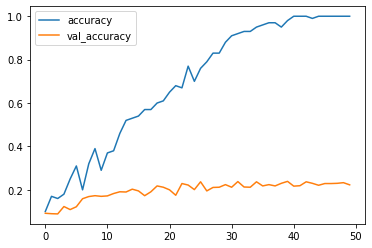

In [104]:
import pandas as pd
from pandas import DataFrame

frame = pd.DataFrame(history.history)

frame.plot(y =['accuracy', 'val_accuracy'])

In [106]:
! ls -lh model_checkpoints_best

total 4.0K
drwxr-xr-x 4 root root 4.0K Oct 16 10:24 checkpoint


In [107]:
new_model = get_new_model()
new_model.load_weights(checkpoints_best_patch)
get_test_accuracy(new_model, x_test, y_test)

accuracy: 0.203
Loss: 2.250680685043335 ,  Accuracy: 0.2029999941587448


# **Save the entier Model**

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
checkpoint_patch = 'modelcheckpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_patch,
                             save_weight_only=False,
                             frequency='epoch',
                             verbose = 1
                             )

In [9]:
model = get_new_model()
model.fit(x_train,y_train,
          validation_data = (x_test,y_test),
          epochs = 3,
          batch_size = 40,
          callbacks = [checkpoint])

Epoch 1/3
250/250 [==============================] - 10s 37ms/step - loss: 1.9591 - accuracy: 0.2783 - val_loss: 1.7016 - val_accuracy: 0.3970

Epoch 00001: saving model to modelcheckpoint


INFO:tensorflow:Assets written to: modelcheckpoint/assets


INFO:tensorflow:Assets written to: modelcheckpoint/assets


Epoch 2/3
250/250 [==============================] - 9s 36ms/step - loss: 1.6020 - accuracy: 0.4184 - val_loss: 1.5664 - val_accuracy: 0.4540

Epoch 00002: saving model to modelcheckpoint


INFO:tensorflow:Assets written to: modelcheckpoint/assets


INFO:tensorflow:Assets written to: modelcheckpoint/assets


Epoch 3/3
250/250 [==============================] - 9s 36ms/step - loss: 1.4744 - accuracy: 0.4700 - val_loss: 1.4840 - val_accuracy: 0.4830

Epoch 00003: saving model to modelcheckpoint


INFO:tensorflow:Assets written to: modelcheckpoint/assets


INFO:tensorflow:Assets written to: modelcheckpoint/assets


In [10]:
! ls -lh modelcheckpoint

total 156K
drwxr-xr-x 2 root root 4.0K Oct 16 13:56 assets
-rw-r--r-- 1 root root  14K Oct 16 13:56 keras_metadata.pb
-rw-r--r-- 1 root root 130K Oct 16 13:56 saved_model.pb
drwxr-xr-x 2 root root 4.0K Oct 16 13:56 variables


In [11]:
! ls -lh modelcheckpoint/variables

total 184K
-rw-r--r-- 1 root root 177K Oct 16 13:56 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Oct 16 13:56 variables.index


In [14]:
get_test_accuracy(model, x_test, y_test)

accuracy: 0.483
Loss: 1.483992338180542 ,  Accuracy: 0.4830000102519989


#create the new model from scratch

In [15]:
from tensorflow.keras.models import load_model

In [18]:
model = load_model(checkpoint_patch)
get_test_accuracy(model, x_test,y_test)

accuracy: 0.483
Loss: 1.483992338180542 ,  Accuracy: 0.4830000102519989


#Saving model architecture only

In [19]:
# Build the model

model = Sequential([
    Dense(units=32, input_shape=(32, 32, 3), activation='relu', name='dense_1'),
    Dense(units=10, activation='softmax', name='dense_2')
])

In [20]:
# Get the model config

config_dict = model.get_config()
print(config_dict)

{'name': 'sequential_2', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_1_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 32, 32, 3), 'dtype': 'float32', 'units': 32, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': No

In [22]:
#Creating a new model from the config

model_same_config = tf.keras.Sequential.from_config(config_dict)

# Check the new model is the same architecture

print('Same config:', 
      model.get_config() == model_same_config.get_config())
print('Same value for first weight matrix:', 
      np.allclose(model.weights[0].numpy(), model_same_config.weights[0].numpy()))

Same config: True
Same value for first weight matrix: False


#Other file formats: JSON and YAML

In [27]:
# Convert the model to JSON

json_string = model.to_json()
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_1_input"}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_reg

In [28]:
# Write out JSON config file
import json

with open('config.json', 'w') as f:
  json.dump(json_string, f)
del json_string

In [29]:
# Read in JSON config file again

with open('config.json', 'r') as f:
    json_string = json.load(f)

In [30]:
# Reinitialize the model

model_same_config = tf.keras.models.model_from_json(json_string)

In [31]:
# Check the new model is the same architecture, but different weights

print('Same config:', 
      model.get_config() == model_same_config.get_config())
print('Same value for first weight matrix:', 
      np.allclose(model.weights[0].numpy(), model_same_config.weights[0].numpy()))

Same config: True
Same value for first weight matrix: False


#Loading pre-trained keras models

In [35]:
from tensorflow.keras.models import load_model

In [51]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [58]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

p1='orange.png'
p2='viaduct.jpg'
p3='water_tower.jpg'
lemon_img = load_img(path=p1, target_size=(224, 224))
viaduct_img = load_img(path=p2, target_size=(224, 224))
water_tower_img = load_img(path=p3, target_size=(224, 224))

In [59]:
#Use ResNet50 model to classify images
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

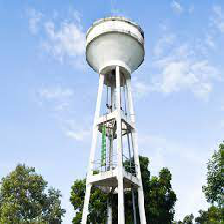

In [61]:

water_tower_img

In [62]:
get_top_5_predictions(water_tower_img)

49152/35363 [=========================================] - 0s 1us/step


,prediction,probability
1,water_tower,0.999554
2,beacon,0.000209874
3,radio_telescope,5.23436e-05
4,bell_cote,4.37726e-05
5,drilling_platform,2.7166e-05


In [63]:
get_top_5_predictions(viaduct_img)

,prediction,probability
1,viaduct,0.99996
2,valley,1.522e-05
3,steel_arch_bridge,1.45945e-05
4,pier,2.2637e-06
5,monastery,2.09562e-06


In [64]:
get_top_5_predictions(lemon_img)

,prediction,probability
1,orange,0.940618
2,lemon,0.051714
3,strawberry,0.00110076
4,plate,0.00102973
5,head_cabbage,0.000570735


#Tensorflow Hub modules

In [65]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [67]:
# Build Google's Mobilenet v1 model

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


In [70]:
#Use MobileNet model to classify images
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img(path=p1, target_size=(160, 160))
viaduct_img = load_img(path=p2, target_size=(160, 160))
water_tower_img = load_img(path=p3, target_size=(160, 160))

In [81]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2021-10-16 16:34:13--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2021-10-16 16:34:14 (90.5 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [85]:
# Read in categories text file

with open("imagenet_classes.txt", "r") as f:
  categories = [s.strip() for s in f.readlines()]

In [86]:
# Useful function: presents top 5 predictions

import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

In [87]:
get_top_5_predictions(viaduct_img)

,prediction
1,violin
2,desk
3,bubble
4,volcano
5,coral reef
